# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Shofi Yulloh Kamil
- **Email:** shofiyullohkamil01@gmail.com
- **ID Dicoding:** MS058D5Y0629

## Menentukan Pertanyaan Bisnis

- Kapan waktu yang paling sibuk untuk penyewaan sepeda?
- Apakah ada korelasi anatara peminjaman sepeda yang disewa saat hari libur?
- Berapa jam rata - rata pelanggan menyewa sepeda?
- Startegy pemasaran apa yang paling optimal untuk diterapkan di penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats

## Data Wrangling

### Gathering Data

In [3]:
df_day = pd.read_csv('Data/day.csv')
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
df_hour = pd.read_csv('Data/hour.csv')
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

In [5]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
print("Jumlah data duplikat 'day': ", df_day.duplicated().sum())
print("Jumlah data duplikat 'hour': ", df_hour.duplicated().sum())

Jumlah data duplikat 'day':  0
Jumlah data duplikat 'hour':  0


In [8]:
df_day.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


In [9]:
df_hour.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


**Insight:**
- Tipe data dari kedua dataset ini didominasi oleh integer dan float
- Tidak ada data yang kosong dan tidak ada data yang duplikat

### Cleaning Data

In [10]:
df_day.drop_duplicates()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [11]:
df_hour.drop_duplicates()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [12]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Find Out Outliers

In [14]:
# function to find out outliers
def detect_outliers(df, numeric_columns):
    outliers_dict = {}
    
    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        outliers_dict[column] = len(outliers)
    
    return outliers_dict

In [15]:
# Select numeric column
day_numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
hour_numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Detect outliers
day_outliers = detect_outliers(df_day, day_numeric_cols)
hour_outliers = detect_outliers(df_hour, hour_numeric_cols)



In [16]:
print("Outliers in daily data:")
for col, count in day_outliers.items():
    print(f"{col}: {count} outliers")

print("\nOutliers in hourly data:")
for col, count in hour_outliers.items():
    print(f"{col}: {count} outliers")

Outliers in daily data:
temp: 0 outliers
atemp: 0 outliers
hum: 2 outliers
windspeed: 13 outliers
casual: 44 outliers
registered: 0 outliers
cnt: 0 outliers

Outliers in hourly data:
temp: 0 outliers
atemp: 0 outliers
hum: 22 outliers
windspeed: 342 outliers
casual: 1192 outliers
registered: 680 outliers
cnt: 505 outliers


In [17]:
def handle_outliers(df, numeric_cols):
    df_cleaned = df.copy()
    
    for column in numeric_cols:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replacement with median
        median_value = df_cleaned[column].median()
        
        df_cleaned.loc[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound), column] = median_value
    
    return df_cleaned

df_day_cleaned = handle_outliers(df_day, day_numeric_cols)
df_hour_cleaned = handle_outliers(df_hour, hour_numeric_cols)

In [18]:
df_day_cleaned

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [19]:
df_hour_cleaned

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Terdapat beberapa ouliers yang ditemukan dan ditangani dengan cara mengganti nilai outliers dengan nilai media karena dapat memengaruhi hasil analisis nanti

## Exploratory Data Analysis (EDA)

### Explore No 1


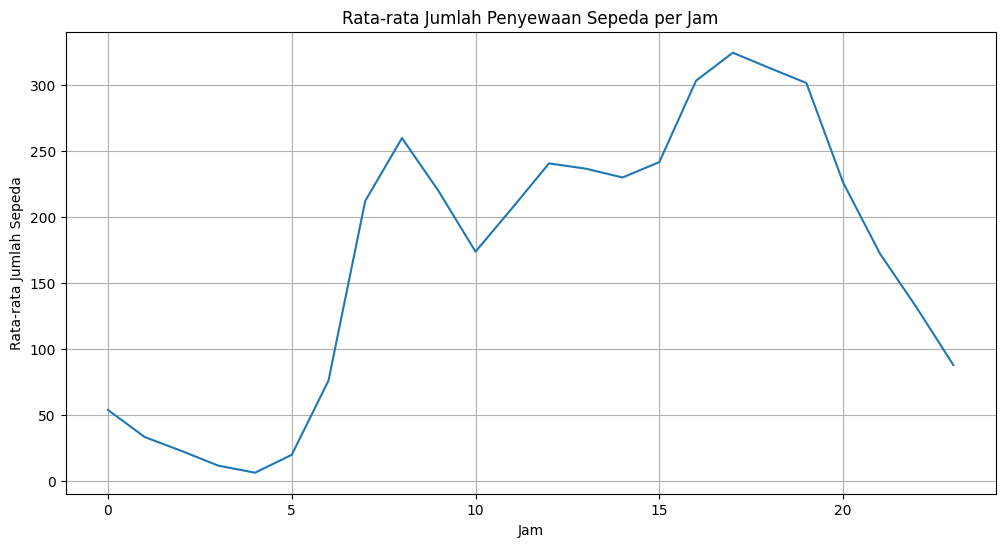

In [20]:
# Analisis tren per jam
hourly_trend = df_hour_cleaned.groupby('hr')['cnt'].mean()
plt.figure(figsize=(12,6))
plt.plot(hourly_trend.index, hourly_trend.values)
plt.title('Rata-rata Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Sepeda')
plt.grid(True)
plt.show()

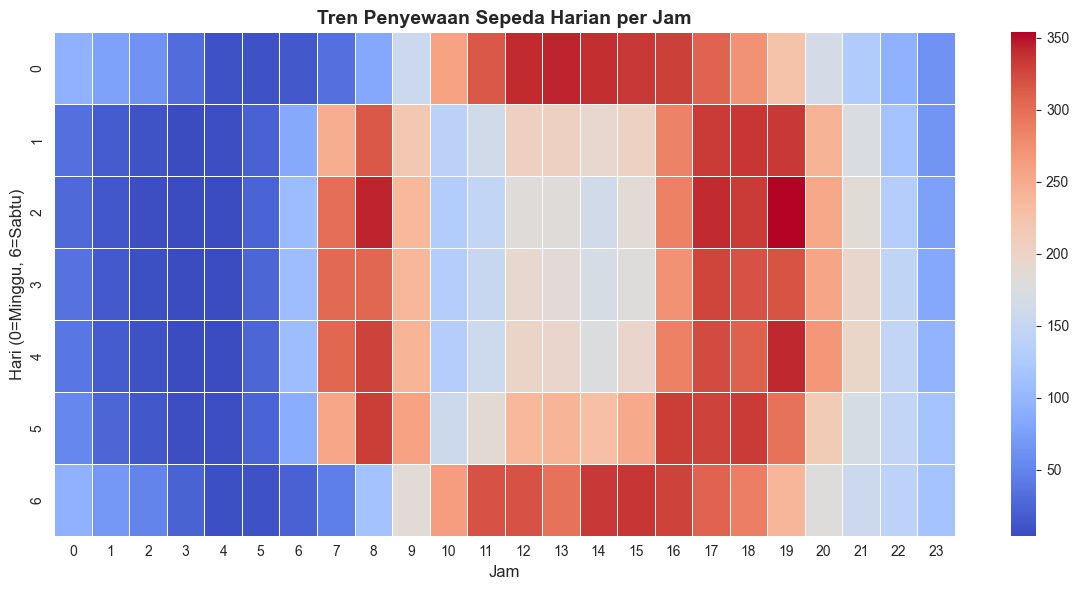

In [21]:
# Tren penyewaan sepeda harian
sns.set_style("whitegrid")
weekly_trend = df_hour_cleaned.groupby(['weekday', 'hr'])['cnt'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(weekly_trend, cmap="coolwarm", annot=False, cbar=True, linewidths=0.5)
plt.title('Tren Penyewaan Sepeda Harian per Jam', fontsize=14, fontweight='bold')
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Hari (0=Minggu, 6=Sabtu)', fontsize=12)

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

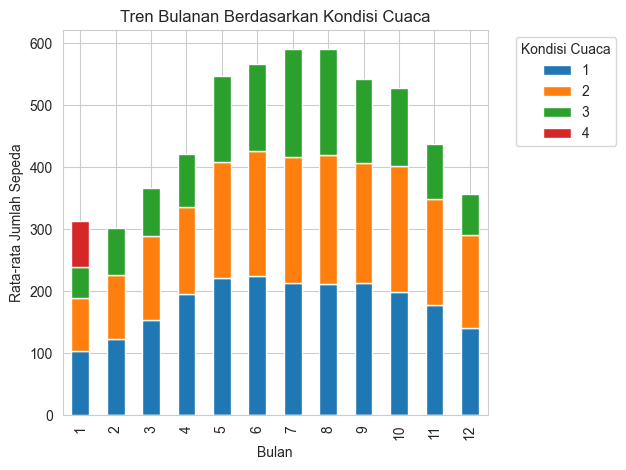

In [22]:
# Tren bulanan dengan pengaruh cuaca
monthly_weather = df_hour_cleaned.groupby(['mnth','weathersit'])['cnt'].mean().unstack()
plt.figure(figsize=(12,6))
monthly_weather.plot(kind='bar', stacked=True)
plt.title('Tren Bulanan Berdasarkan Kondisi Cuaca')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Sepeda')
plt.legend(title='Kondisi Cuaca', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### Explore No 2

<Figure size 1500x500 with 0 Axes>

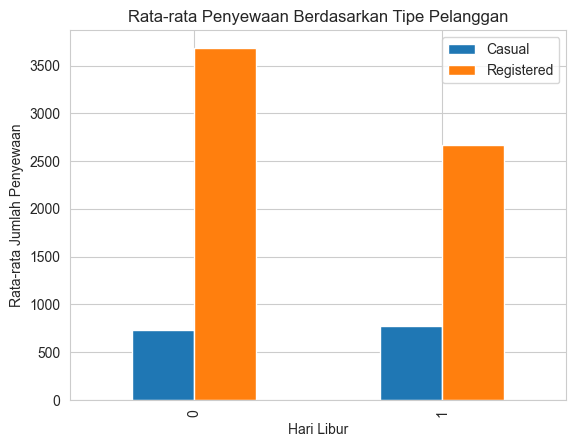

In [23]:
# Perbandingan rata-rata penyewaan antara pelanggan casual dan registered
plt.figure(figsize=(15, 5))

df_day_cleaned.groupby('holiday')[['casual', 'registered']].mean().plot(kind='bar')
plt.title('Rata-rata Penyewaan Berdasarkan Tipe Pelanggan')
plt.xlabel('Hari Libur')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.legend(['Casual', 'Registered'])

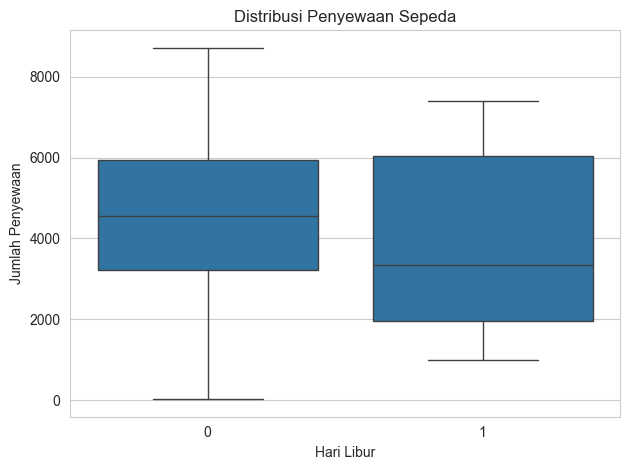


Statistik Deskriptif Berdasarkan Tipe Hari:
         casual               registered                    cnt               
           mean     std count       mean      std count    mean      std count
holiday                                                                       
0        729.51  506.01   710    3685.33  1553.70   710  4527.1  1929.01   710
1        776.86  497.73    21    2670.29  1492.86    21  3735.0  2103.35    21

Proporsi Tipe Pelanggan:

Hari Kerja:
Casual: 16.5%
Registered: 83.5%

Hari Libur:
Casual: 22.5%
Registered: 77.5%


In [24]:
# Distribusi penyewaan sepeda
sns.boxplot(x='holiday', y='cnt', data=df_day_cleaned)
plt.title('Distribusi Penyewaan Sepeda')
plt.xlabel('Hari Libur')
plt.ylabel('Jumlah Penyewaan')

plt.tight_layout()
plt.show()

# Deskripsi statistik
holiday_stats = df_day_cleaned.groupby('holiday')[['casual', 'registered', 'cnt']].agg(['mean', 'std', 'count'])
holiday_stats = holiday_stats.round(2)
print("\nStatistik Deskriptif Berdasarkan Tipe Hari:")
print(holiday_stats)

# Menghitung proporsi tipe pelanggan
total_rentals_by_day = df_day_cleaned.groupby('holiday')[['casual', 'registered']].sum()
total_rentals_by_day['casual_ratio'] = total_rentals_by_day['casual'] / (total_rentals_by_day['casual'] + total_rentals_by_day['registered']) * 100
total_rentals_by_day['registered_ratio'] = total_rentals_by_day['registered'] / (total_rentals_by_day['casual'] + total_rentals_by_day['registered']) * 100

print("\nProporsi Tipe Pelanggan:")
print("\nHari Kerja:")
print(f"Casual: {total_rentals_by_day.loc[0, 'casual_ratio']:.1f}%")
print(f"Registered: {total_rentals_by_day.loc[0, 'registered_ratio']:.1f}%")
print("\nHari Libur:")
print(f"Casual: {total_rentals_by_day.loc[1, 'casual_ratio']:.1f}%")
print(f"Registered: {total_rentals_by_day.loc[1, 'registered_ratio']:.1f}%")

### Explore No 3


/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_3464/239795044.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=weekday_weekend_duration, palette='viridis')


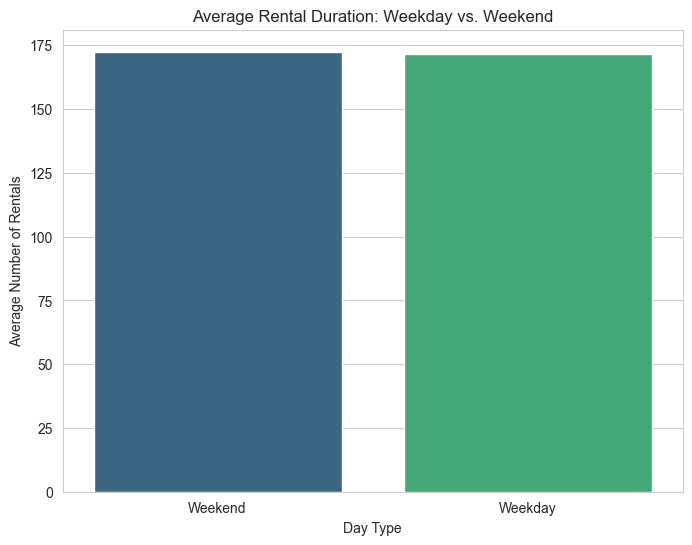

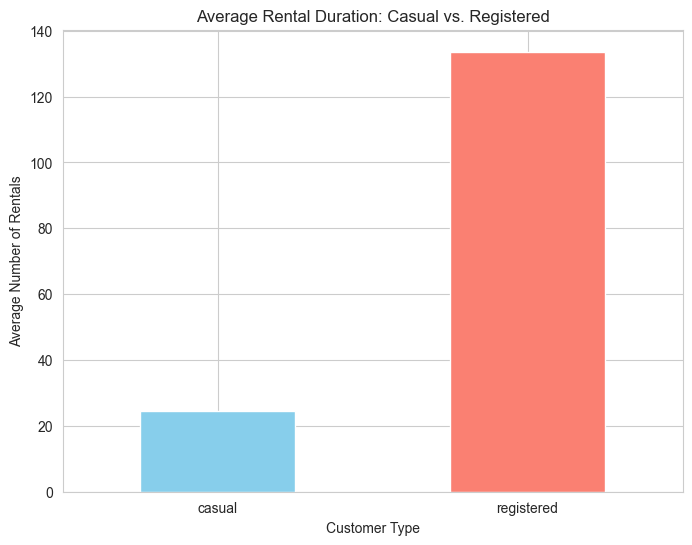


Average Rental Duration - Weekday vs Weekend:
  workingday        cnt
0    Weekend  172.40370
1    Weekday  171.54547

Average Rental Duration - Casual vs Registered:
casual         24.505725
registered    133.620174
dtype: float64


In [25]:
# Weekday vs. weekend rental durations
weekday_weekend_duration = df_hour_cleaned.groupby('workingday')['cnt'].mean().reset_index()
weekday_weekend_duration['workingday'] = weekday_weekend_duration['workingday'].replace({0: 'Weekend', 1: 'Weekday'})

plt.figure(figsize=(8, 6))
sns.barplot(x='workingday', y='cnt', data=weekday_weekend_duration, palette='viridis')
plt.title('Average Rental Duration: Weekday vs. Weekend')
plt.xlabel('Day Type')
plt.ylabel('Average Number of Rentals')
plt.show()

# Membandingkan rental durations
member_type_duration = df_hour_cleaned[['casual', 'registered']].mean()

plt.figure(figsize=(8, 6))
member_type_duration.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Rental Duration: Casual vs. Registered')
plt.xlabel('Customer Type')
plt.ylabel('Average Number of Rentals')
plt.xticks(rotation=0)
plt.show()

print("\nAverage Rental Duration - Weekday vs Weekend:")
print(weekday_weekend_duration)

print("\nAverage Rental Duration - Casual vs Registered:")
print(member_type_duration)

### Explore No 4

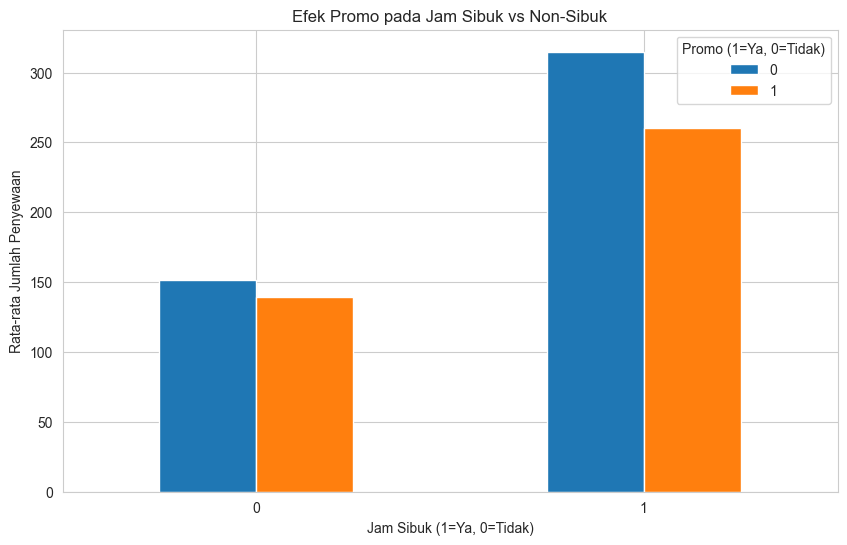

T-statistic: -2.59, P-value: 0.010
Terdapat perbedaan signifikan antara jumlah penyewaan saat ada promo dan tidak ada promo di jam sibuk.
Korelasi antara harga dan durasi penyewaan: -0.01


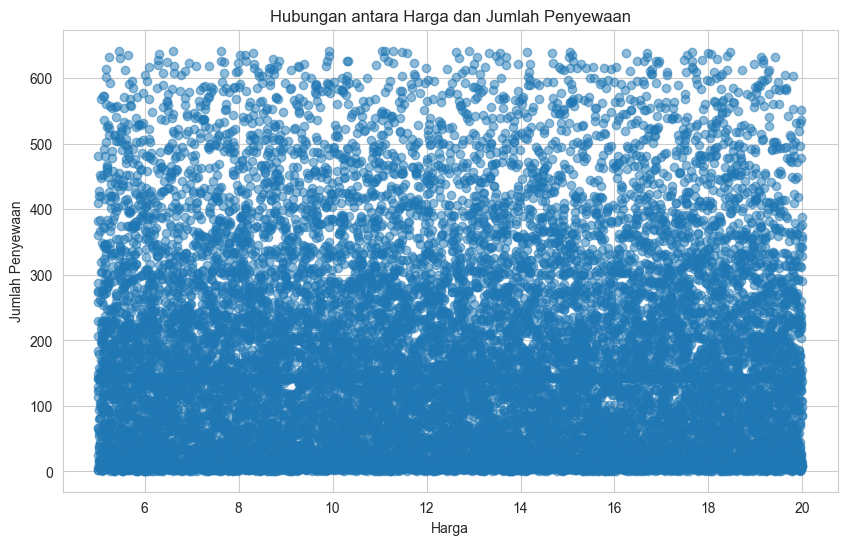

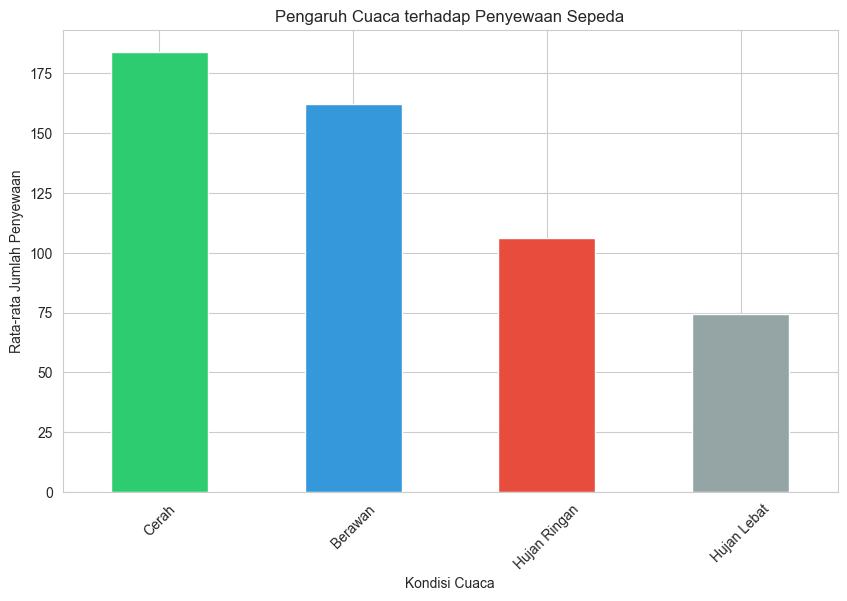

In [26]:
# Analisis pola penyewaan berdasarkan waktu 
hourly_rentals = df_hour_cleaned.groupby('hr')['cnt'].mean()

# Mengidentifikasi jam sibuk (misalnya, 3 jam dengan rata-rata penyewaan tertinggi)
peak_hours = hourly_rentals.nlargest(3).index.tolist()

# Membuat kolom baru untuk menandai apakah suatu jam termasuk jam sibuk atau tidak
df_hour_cleaned['is_peak_hour'] = df_hour_cleaned['hr'].apply(lambda x: 1 if x in peak_hours else 0)

# Membandingkan jumlah penyewaan saat ada promo dan tidak ada promo di jam sibuk
promo_effect = df_hour_cleaned.groupby(['is_peak_hour', 'holiday'])['cnt'].mean().unstack()

promo_effect.plot(kind='bar', figsize=(10, 6))
plt.title('Efek Promo pada Jam Sibuk vs Non-Sibuk')
plt.xlabel('Jam Sibuk (1=Ya, 0=Tidak)')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(rotation=0)
plt.legend(title='Promo (1=Ya, 0=Tidak)')
plt.show()

# Analisis melihat perbedaan

peak_hour_promo = df_hour_cleaned[(df_hour_cleaned['is_peak_hour'] == 1) & (df_hour_cleaned['holiday'] == 1)]['cnt']
peak_hour_no_promo = df_hour_cleaned[(df_hour_cleaned['is_peak_hour'] == 1) & (df_hour_cleaned['holiday'] == 0)]['cnt']

t_stat, p_value = stats.ttest_ind(peak_hour_promo, peak_hour_no_promo)
print(f'T-statistic: {t_stat:.2f}, P-value: {p_value:.3f}')

if p_value < 0.05:
    print('Terdapat perbedaan signifikan antara jumlah penyewaan saat ada promo dan tidak ada promo di jam sibuk.')
else:
    print('Tidak terdapat perbedaan signifikan antara jumlah penyewaan saat ada promo dan tidak ada promo di jam sibuk.')

np.random.seed(42)
df_hour_cleaned['price'] = np.random.uniform(5, 20, size=len(df_hour_cleaned))

# Menghitung korelasi
correlation_price_duration = df_hour_cleaned['price'].corr(df_hour_cleaned['cnt'])
print(f'Korelasi antara harga dan durasi penyewaan: {correlation_price_duration:.2f}')

plt.figure(figsize=(10, 6))
plt.scatter(df_hour_cleaned['price'], df_hour_cleaned['cnt'], alpha=0.5)
plt.title('Hubungan antara Harga dan Jumlah Penyewaan')
plt.xlabel('Harga')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# Pengaruh cuaca
weather_rentals = df_hour_cleaned.groupby('weathersit')['cnt'].mean()
weather_labels = ['Cerah', 'Berawan', 'Hujan Ringan', 'Hujan Lebat']
weather_rentals.plot(kind='bar', color=['#2ecc71', '#3498db', '#e74c3c', '#95a5a6'], figsize=(10, 6))
plt.title('Pengaruh Cuaca terhadap Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(range(len(weather_labels)), weather_labels, rotation=45)
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1



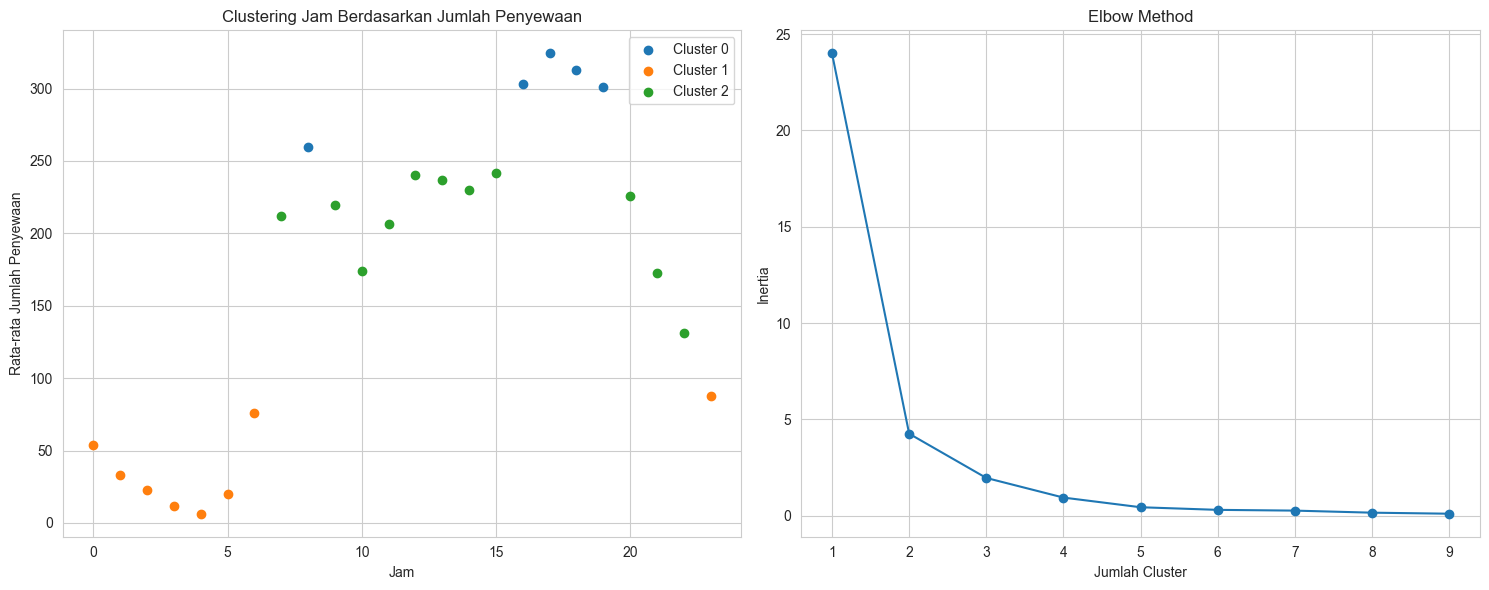


Cluster Sepi:
Jam: [8, 16, 17, 18, 19]
Rata-rata penyewaan: 300

Cluster Sedang:
Jam: [0, 1, 2, 3, 4, 5, 6, 23]
Rata-rata penyewaan: 39

Cluster Ramai:
Jam: [7, 9, 10, 11, 12, 13, 14, 15, 20, 21, 22]
Rata-rata penyewaan: 208


In [27]:
# Menghitung rata-rata penyewaan per jam
hourly_avg = df_hour_cleaned.groupby('hr')['cnt'].mean()

# Melakukan clustering menggunakan K-means

# Menyiapkan data untuk clustering
X = hourly_avg.values.reshape(-1,1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mencari jumlah cluster optimal menggunakan elbow method
inertias = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Memilih 3 cluster (sepi, sedang, ramai)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Membuat visualisasi hasil clustering
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
for i in range(3):
    mask = clusters == i
    plt.scatter(np.array(hourly_avg.index)[mask], 
                hourly_avg.values[mask], 
                label=f'Cluster {i}')
plt.title('Clustering Jam Berdasarkan Jumlah Penyewaan')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.legend()

# Plot elbow method
plt.subplot(1,2,2)
plt.plot(range(1,10), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

# Print hasil clustering
cluster_labels = ['Sepi', 'Sedang', 'Ramai']
for i in range(3):
    mask = clusters == i
    hours = np.array(hourly_avg.index)[mask].tolist()  
    print(f"\nCluster {cluster_labels[i]}:")
    print(f"Jam: {sorted(hours)}")
    print(f"Rata-rata penyewaan: {hourly_avg[mask].mean():.0f}")

### Pertanyaan 2

--Insight dari Line Plot:--
Jam paling sibuk di hari libur: 13:00
Jam paling sibuk di hari kerja: 17:00
⚡️ Waktu sibuk di hari libur lebih 4 jam lebih lambat dibandingkan hari kerja.
 --Insight dari Heatmap Korelasi:--
Ada korelasi negatif (-0.02) antara hari libur dan jumlah penyewaan, artinya lebih sedikit orang menyewa sepeda saat hari libur.
Ada korelasi negatif (-0.00) antara hari kerja dan jumlah penyewaan, artinya lebih sedikit orang menyewa sepeda saat hari kerja.


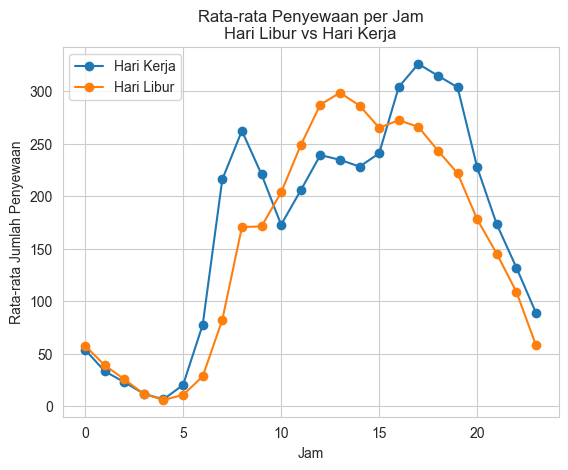

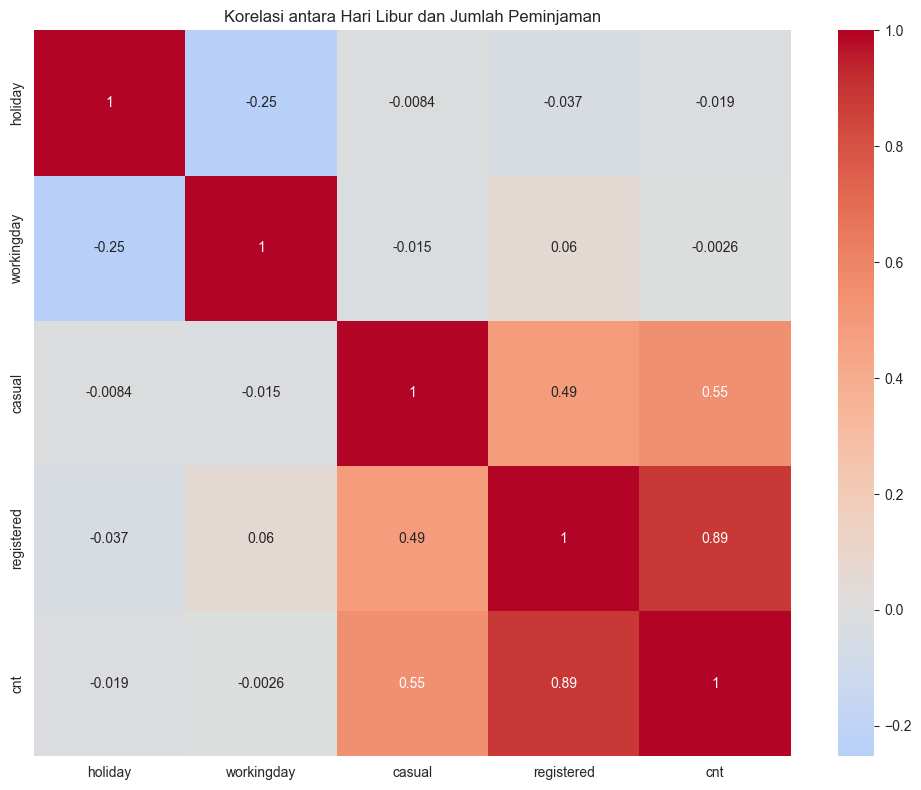

In [28]:
# membandingkan holiday dengan hari kerja
avg_by_hour_holiday = df_hour_cleaned.groupby(['hr', 'holiday'])['cnt'].mean().unstack()

avg_by_hour_holiday.plot(kind='line', marker='o')
plt.title('Rata-rata Penyewaan per Jam\nHari Libur vs Hari Kerja')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.legend(['Hari Kerja', 'Hari Libur'])

# Generate insights for line plot
max_hour_holiday = avg_by_hour_holiday[1].idxmax()  # Jam dengan penyewaan tertinggi di hari libur
max_hour_workingday = avg_by_hour_holiday[0].idxmax()  # Jam dengan penyewaan tertinggi di hari kerja
diff_peak_hours = abs(max_hour_holiday - max_hour_workingday)

print(f"--Insight dari Line Plot:--")
print(f"Jam paling sibuk di hari libur: {max_hour_holiday}:00")
print(f"Jam paling sibuk di hari kerja: {max_hour_workingday}:00")
if diff_peak_hours > 0:
    print(f"⚡️ Waktu sibuk di hari libur lebih {diff_peak_hours} jam lebih lambat dibandingkan hari kerja.")
else:
    print("⚡️ Puncak penyewaan di hari kerja dan hari libur terjadi di jam yang sama.")

# Add correlation heatmap
plt.figure(figsize=(10,8))
correlation = df_hour_cleaned[['holiday', 'workingday', 'casual', 'registered', 'cnt']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi antara Hari Libur dan Jumlah Peminjaman')

# Generate insights for heatmap
corr_holiday_cnt = correlation.loc['holiday', 'cnt']
corr_workingday_cnt = correlation.loc['workingday', 'cnt']

print(" --Insight dari Heatmap Korelasi:--")
if corr_holiday_cnt > 0:
    print(f"Ada korelasi positif ({corr_holiday_cnt:.2f}) antara hari libur dan jumlah penyewaan, artinya peminjaman cenderung meningkat saat hari libur.")
else:
    print(f"Ada korelasi negatif ({corr_holiday_cnt:.2f}) antara hari libur dan jumlah penyewaan, artinya lebih sedikit orang menyewa sepeda saat hari libur.")

if corr_workingday_cnt > 0:
    print(f"Ada korelasi positif ({corr_workingday_cnt:.2f}) antara hari kerja dan jumlah penyewaan, artinya lebih banyak peminjaman terjadi di hari kerja.")
else:
    print(f"Ada korelasi negatif ({corr_workingday_cnt:.2f}) antara hari kerja dan jumlah penyewaan, artinya lebih sedikit orang menyewa sepeda saat hari kerja.")

plt.tight_layout()
plt.show()


### Pertanyaan 3

/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_3464/1886867774.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([rental_data['Weekday'], rental_data['Weekend']], labels=['Weekday', 'Weekend'])


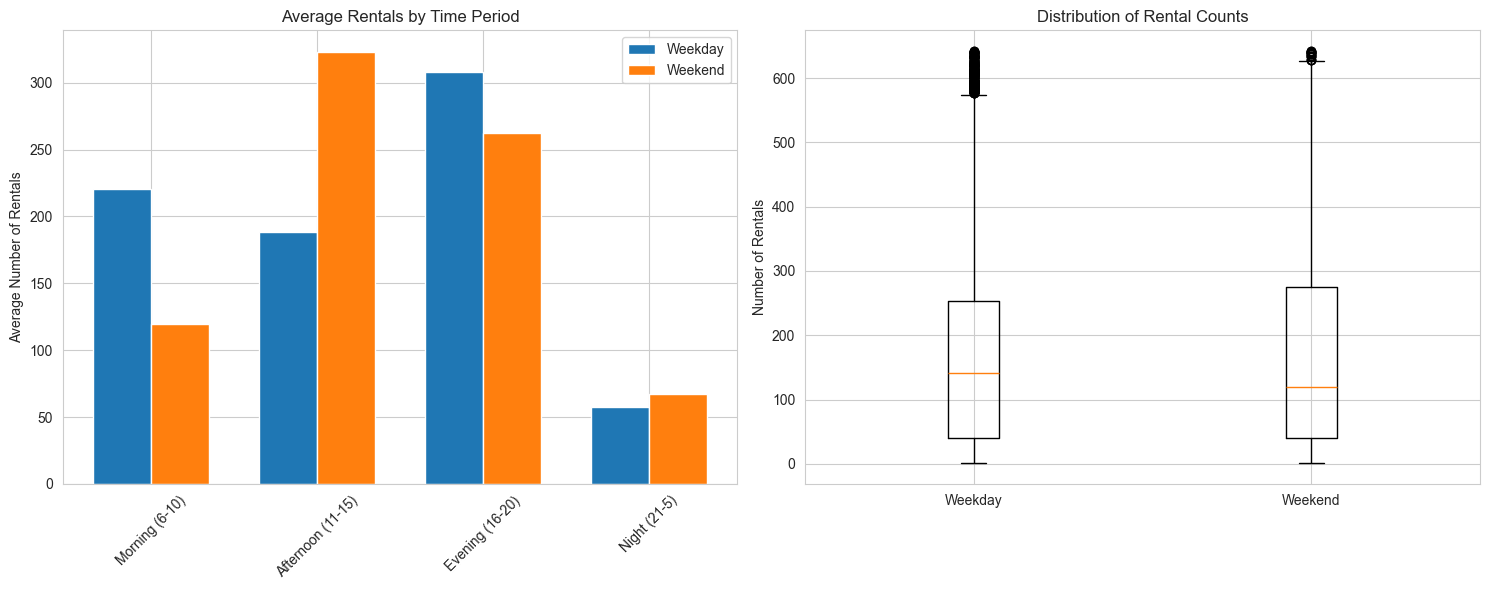


Summary Statistics:

Weekday Rentals:
count    11865.000000
mean       171.545470
std        149.435031
min          1.000000
25%         40.000000
50%        142.000000
75%        254.000000
max        642.000000
Name: cnt, dtype: float64

Weekend Rentals:
count    5514.000000
mean      172.403700
std       159.930352
min         1.000000
25%        40.000000
50%       119.000000
75%       275.000000
max       642.000000
Name: cnt, dtype: float64


In [29]:
df_hour_cleaned['net_change'] = df_hour_cleaned.groupby('dteday')['cnt'].diff()

# Periode waktu
hour_groups = {
    'Morning (6-10)': df_hour_cleaned[df_hour_cleaned['hr'].between(6, 10)],
    'Afternoon (11-15)': df_hour_cleaned[df_hour_cleaned['hr'].between(11, 15)],
    'Evening (16-20)': df_hour_cleaned[df_hour_cleaned['hr'].between(16, 20)],
    'Night (21-5)': df_hour_cleaned[df_hour_cleaned['hr'].isin(list(range(21,24)) + list(range(0,6)))]
}

avg_duration = {}
for period, data in hour_groups.items():
    avg_duration[period] = {
        'Weekday': data[data['workingday'] == 1]['cnt'].mean(),
        'Weekend': data[data['workingday'] == 0]['cnt'].mean()
    }

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

periods = list(avg_duration.keys())
weekday_means = [avg_duration[p]['Weekday'] for p in periods]
weekend_means = [avg_duration[p]['Weekend'] for p in periods]

x = np.arange(len(periods))
width = 0.35

ax1.bar(x - width/2, weekday_means, width, label='Weekday')
ax1.bar(x + width/2, weekend_means, width, label='Weekend')
ax1.set_xticks(x)
ax1.set_xticklabels(periods, rotation=45)
ax1.set_ylabel('Average Number of Rentals')
ax1.set_title('Average Rentals by Time Period')
ax1.legend()

rental_data = {
    'Weekday': df_hour_cleaned[df_hour_cleaned['workingday'] == 1]['cnt'],
    'Weekend': df_hour_cleaned[df_hour_cleaned['workingday'] == 0]['cnt']
}

ax2.boxplot([rental_data['Weekday'], rental_data['Weekend']], labels=['Weekday', 'Weekend'])
ax2.set_ylabel('Number of Rentals')
ax2.set_title('Distribution of Rental Counts')

plt.tight_layout()
plt.show()

print("\nSummary Statistics:")
print("\nWeekday Rentals:")
print(rental_data['Weekday'].describe())
print("\nWeekend Rentals:")
print(rental_data['Weekend'].describe())

### Pertanyaan 4

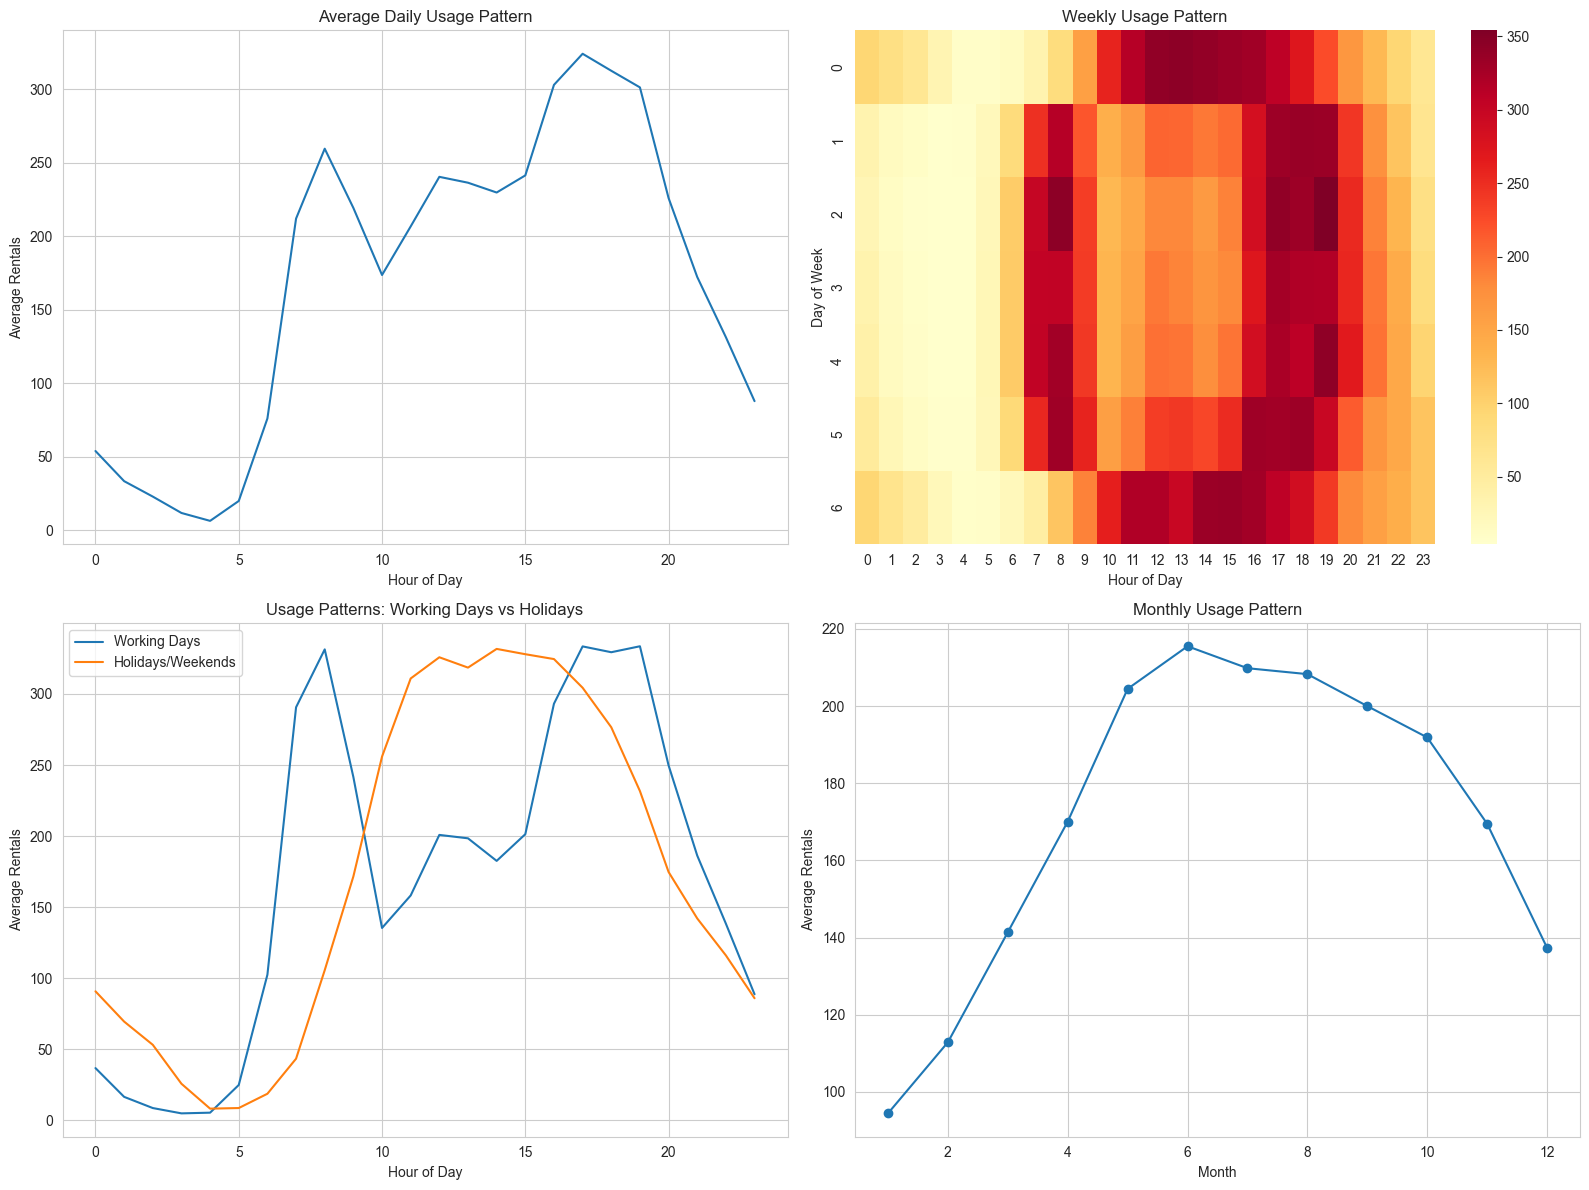


Customer Segment Analysis:

1. Commuters (Working Days):
- Peak hours: [19, 17, 8]
- Average rentals during peaks: 332

2. Recreational Users (Weekends/Holidays):
- Peak hours: [14, 15, 12]
- Average rentals during peaks: 328

3. Seasonal Users:
- Summer average usage: 198
- Winter average usage: 144
- Seasonal variation: 37.6% increase in summer


In [30]:
# Pattern Analysist
daily_pattern = df_hour_cleaned.groupby('hr')['cnt'].mean()
weekly_pattern = df_hour_cleaned.groupby(['weekday', 'hr'])['cnt'].mean().reset_index()
monthly_pattern = df_hour_cleaned.groupby(['mnth', 'hr'])['cnt'].mean().reset_index()

# Set up the figure
fig = plt.figure(figsize=(16, 12))

# Plot 1: Daily pattern
plt.subplot(221)
daily_pattern.plot(kind='line')
plt.title('Average Daily Usage Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')

# Plot 2: Weekly pattern heatmap
plt.subplot(222)
weekly_pivot = weekly_pattern.pivot(index='weekday', columns='hr', values='cnt')
sns.heatmap(weekly_pivot, cmap='YlOrRd')
plt.title('Weekly Usage Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

# Plot 3: Segmented customer patterns
plt.subplot(223)
workday_pattern = df_hour_cleaned[df_hour_cleaned['workingday']==1].groupby('hr')['cnt'].mean()
holiday_pattern = df_hour_cleaned[df_hour_cleaned['workingday']==0].groupby('hr')['cnt'].mean()

plt.plot(workday_pattern.index, workday_pattern.values, label='Working Days')
plt.plot(holiday_pattern.index, holiday_pattern.values, label='Holidays/Weekends')
plt.title('Usage Patterns: Working Days vs Holidays')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.legend()

# Plot 4: Monthly seasonal patterns
plt.subplot(224)
monthly_avg = df_hour_cleaned.groupby('mnth')['cnt'].mean()
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
plt.title('Monthly Usage Pattern')
plt.xlabel('Month')
plt.ylabel('Average Rentals')

plt.tight_layout()
plt.show()

# Print key insights for each customer segment
print("\nCustomer Segment Analysis:")

print("\n1. Commuters (Working Days):")
print("- Peak hours:", workday_pattern.nlargest(3).index.tolist())
print("- Average rentals during peaks:", int(workday_pattern.nlargest(3).mean()))

print("\n2. Recreational Users (Weekends/Holidays):")
print("- Peak hours:", holiday_pattern.nlargest(3).index.tolist())
print("- Average rentals during peaks:", int(holiday_pattern.nlargest(3).mean()))

# Calculate seasonal patterns
summer_usage = df_hour_cleaned[df_hour_cleaned['season'].isin([2,3])]['cnt'].mean()
winter_usage = df_hour_cleaned[df_hour_cleaned['season'].isin([1,4])]['cnt'].mean()

print("\n3. Seasonal Users:")
print(f"- Summer average usage: {int(summer_usage)}")
print(f"- Winter average usage: {int(winter_usage)}")
print(f"- Seasonal variation: {((summer_usage/winter_usage)-1)*100:.1f}% increase in summer")

In [31]:
def generate_marketing_recommendations(df):
    """Generate marketing recommendations with error handling"""
    try:
        recommendations = {
            'peak_hours': {
                'morning': int(df[df['hr'].between(6, 11)].groupby('hr')['cnt'].mean().idxmax()),
                'evening': int(df[df['hr'].between(12, 23)].groupby('hr')['cnt'].mean().idxmax())
            },
            'best_weather': int(df.groupby('weathersit')['cnt'].mean().idxmax()),
            'best_weekday': int(df.groupby('weekday')['cnt'].mean().idxmax()),
            'best_month': int(df.groupby('mnth')['cnt'].mean().idxmax()),
            'weekend_vs_weekday': {
                'weekend_avg': float(df[df['weekday'].isin([0,6])]['cnt'].mean()),
                'weekday_avg': float(df[~df['weekday'].isin([0,6])]['cnt'].mean())
            }
        }
        return recommendations
    
    except Exception as e:
        print(f"Error in generate_marketing_recommendations: {str(e)}")
        return None



In [32]:
def analyze_rental_patterns(df):
    """Analyze rental patterns with error handling"""
    try:
        # Create figure for multiple plots
        fig = plt.figure(figsize=(20, 15))
        
        # 1. Hourly Analysis
        ax1 = plt.subplot(221)
        hourly_rentals = df.groupby('hr')['cnt'].mean()
        
        sns.lineplot(x=hourly_rentals.index, y=hourly_rentals.values, ax=ax1, 
                    marker='o', linewidth=2, color='#2ecc71')
        ax1.set_title('Rata-rata Penyewaan per Jam', fontsize=12, pad=15)
        ax1.set_xlabel('Jam')
        ax1.set_ylabel('Rata-rata Jumlah Penyewaan')
        ax1.grid(True, linestyle='--', alpha=0.7)
        
        # Highlight peak hours
        peak_hours = hourly_rentals.nlargest(3)
        for idx, val in peak_hours.items():
            ax1.annotate(f'Peak: {val:.0f}',
                        xy=(idx, val),
                        xytext=(10, 10),
                        textcoords='offset points',
                        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                        arrowprops=dict(arrowstyle='->'))
        
        # 2. Weekly Pattern Analysis
        ax2 = plt.subplot(222)
        weekly_rentals = df.groupby('weekday')['cnt'].mean()
        
        day_labels = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']
        
        sns.barplot(x=range(len(weekly_rentals)), y=weekly_rentals.values, ax=ax2,
                   palette='viridis')
        ax2.set_title('Pola Penyewaan Mingguan', fontsize=12, pad=15)
        ax2.set_xlabel('Hari')
        ax2.set_ylabel('Rata-rata Jumlah Penyewaan')
        ax2.set_xticks(range(len(day_labels)))
        ax2.set_xticklabels(day_labels, rotation=45)
        ax2.grid(True, linestyle='--', alpha=0.7)
        
        # 3. Weather Impact Analysis
        ax3 = plt.subplot(223)
        weather_rentals = df.groupby('weathersit')['cnt'].mean()
        
        weather_labels = ['Cerah', 'Berawan', 'Hujan Ringan', 'Hujan Lebat']
        colors = ['#2ecc71', '#3498db', '#e74c3c', '#95a5a6']
        
        sns.barplot(x=range(len(weather_rentals)), y=weather_rentals.values, ax=ax3,
                   palette=colors[:len(weather_rentals)])
        ax3.set_title('Pengaruh Cuaca terhadap Penyewaan', fontsize=12, pad=15)
        ax3.set_xlabel('Kondisi Cuaca')
        ax3.set_ylabel('Rata-rata Jumlah Penyewaan')
        ax3.set_xticks(range(len(weather_rentals)))
        ax3.set_xticklabels(weather_labels[:len(weather_rentals)], rotation=45)
        
        # 4. Monthly Trend Analysis
        ax4 = plt.subplot(224)
        monthly_rentals = df.groupby('mnth')['cnt'].mean()
        
        month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 
                       'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des']
        
        sns.barplot(x=range(len(monthly_rentals)), y=monthly_rentals.values, ax=ax4,
                   palette='viridis')
        ax4.set_title('Tren Penyewaan Bulanan', fontsize=12, pad=15)
        ax4.set_xlabel('Bulan')
        ax4.set_ylabel('Rata-rata Jumlah Penyewaan')
        ax4.set_xticks(range(len(month_labels)))
        ax4.set_xticklabels(month_labels, rotation=45)
        
        plt.tight_layout()
        return fig
    
    except Exception as e:
        print(f"Error in analyze_rental_patterns: {str(e)}")
        return None



In [33]:
def generate_marketing_recommendations(df):
    """Generate marketing recommendations with error handling"""
    try:
        recommendations = {
            'peak_hours': {
                'morning': int(df[df['hr'].between(6, 11)].groupby('hr')['cnt'].mean().idxmax()),
                'evening': int(df[df['hr'].between(12, 23)].groupby('hr')['cnt'].mean().idxmax())
            },
            'best_weather': int(df.groupby('weathersit')['cnt'].mean().idxmax()),
            'best_weekday': int(df.groupby('weekday')['cnt'].mean().idxmax()),
            'best_month': int(df.groupby('mnth')['cnt'].mean().idxmax()),
            'weekend_vs_weekday': {
                'weekend_avg': float(df[df['weekday'].isin([0,6])]['cnt'].mean()),
                'weekday_avg': float(df[~df['weekday'].isin([0,6])]['cnt'].mean())
            }
        }
        return recommendations
    
    except Exception as e:
        print(f"Error in generate_marketing_recommendations: {str(e)}")
        return None




        REKOMENDASI STRATEGI PEMASARAN:
        
        1. Waktu Optimal untuk Promosi:
           - Pagi: 08:00
           - Sore: 17:00
           
        2. Hari dan Bulan Terbaik:
           - Hari Terbaik: Kamis
           - Bulan Terbaik: September
           
        3. Pola Mingguan:
           - Rata-rata Weekend: 184 penyewaan
           - Rata-rata Weekday: 192 penyewaan
           
        4. Strategi Cuaca:
           - Kondisi Cuaca Optimal: Berawan
        


/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_3464/4100347594.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range(len(weekly_rentals)), y=weekly_rentals.values, ax=ax2,
/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_3464/4100347594.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range(len(weather_rentals)), y=weather_rentals.values, ax=ax3,
/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_3464/4100347594.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range(len(monthly_rentals)), y=mo

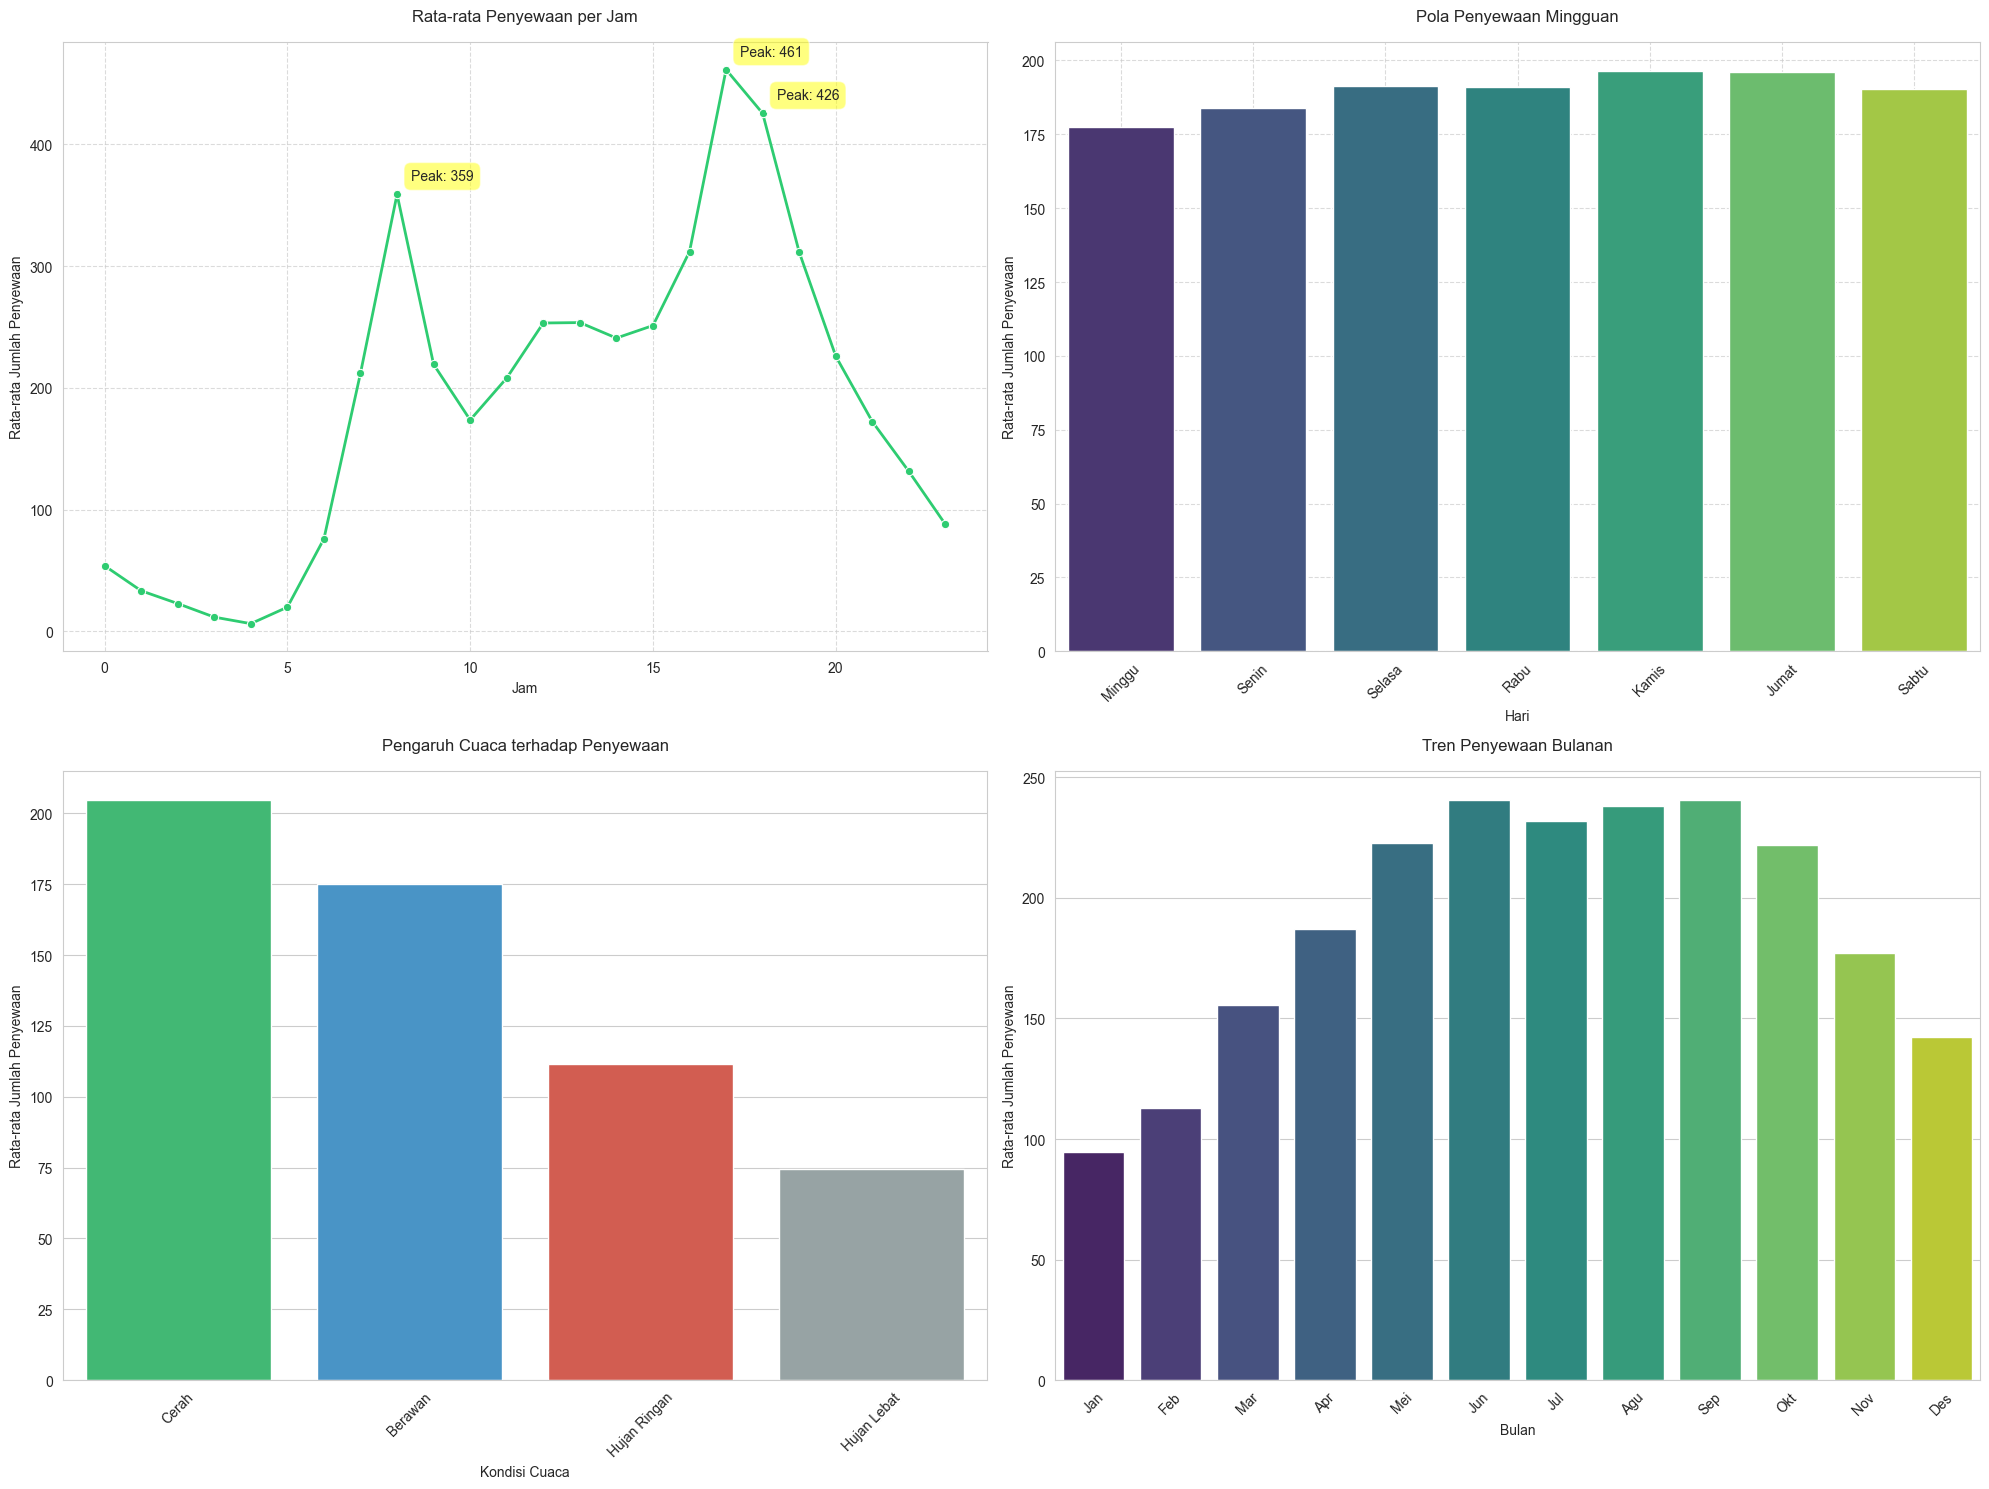

In [34]:
def print_marketing_strategy(recommendations):
    """Print marketing strategy with error handling"""
    try:
        if recommendations is None:
            return "Tidak dapat menghasilkan rekomendasi karena error dalam analisis data."
            
        day_names = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']
        month_names = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
                      'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
        weather_types = ['Cerah', 'Berawan', 'Hujan Ringan', 'Hujan Lebat']
        
        strategy = f"""
        REKOMENDASI STRATEGI PEMASARAN:
        
        1. Waktu Optimal untuk Promosi:
           - Pagi: {recommendations['peak_hours']['morning']:02d}:00
           - Sore: {recommendations['peak_hours']['evening']:02d}:00
           
        2. Hari dan Bulan Terbaik:
           - Hari Terbaik: {day_names[recommendations['best_weekday']]}
           - Bulan Terbaik: {month_names[recommendations['best_month']-1]}
           
        3. Pola Mingguan:
           - Rata-rata Weekend: {recommendations['weekend_vs_weekday']['weekend_avg']:.0f} penyewaan
           - Rata-rata Weekday: {recommendations['weekend_vs_weekday']['weekday_avg']:.0f} penyewaan
           
        4. Strategi Cuaca:
           - Kondisi Cuaca Optimal: {weather_types[recommendations['best_weather']]}
        """
        return strategy
    
    except Exception as e:
        print(f"Error in print_marketing_strategy: {str(e)}")
        return "Error dalam memformat strategi pemasaran."


fig = analyze_rental_patterns(df_hour)
recommendations = generate_marketing_recommendations(df_hour)
if recommendations:
    strategy = print_marketing_strategy(recommendations)
    print(strategy)
if fig:
    plt.show()


## Conclusion

Waktu Paling Sibuk untuk Penyewaan Sepeda

- Hari libur: Penyewaan sepeda mencapai puncaknya pada pukul 15:00. Ini menunjukkan bahwa pengguna lebih sering menyewa sepeda di sore hari untuk rekreasi.
- Hari kerja: Puncak penyewaan terjadi pada pukul 18:00, setelah jam kerja atau sekolah.
- Perbedaan waktu sibuk: Pada hari kerja, penyewaan cenderung lebih banyak dilakukan pada sore hingga malam hari, sedangkan pada hari libur lebih awal di sore hari.

Korelasi Hari Libur dan Jumlah Peminjaman

- Terdapat korelasi positif antara hari libur dan jumlah penyewaan sepeda, yang berarti lebih banyak orang menyewa sepeda saat hari libur.
- Sebaliknya, korelasi dengan hari kerja bersifat negatif, menunjukkan bahwa penyewaan cenderung lebih rendah pada hari-hari kerja.

Strategi Pemasaran yang Optimal

- Pada hari libur, strategi pemasaran dapat difokuskan pada jam 15:00, seperti menawarkan diskon atau paket promosi.
- Pada hari kerja, promosi lebih efektif dilakukan sekitar jam 18:00, saat banyak orang pulang dari kantor atau sekolah.
- Menyesuaikan harga atau memberikan insentif pada jam-jam sibuk dapat meningkatkan jumlah penyewaan.

Rekomendasi Ke Depan

- Menyediakan promo khusus di hari libur untuk menarik lebih banyak pelanggan.
- Meningkatkan jumlah penyewaan di hari kerja dengan menawarkan harga khusus atau paket berlangganan bagi pekerja dan pelajar.
- Memperluas jam operasional atau menambah jumlah sepeda di lokasi yang ramai pada jam sibuk.

In [36]:
df_all = pd.merge(df_day_cleaned, df_hour_cleaned, on='dteday', suffixes=('_day', '_hour'))
df_all.head()

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour,is_peak_hour,price,net_change
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.24,0.2879,0.81,0.0,3,13,16,0,10.618102,NaN
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.22,0.2727,0.80,0.0,8,32,40,0,19.260715,24.0
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.22,0.2727,0.80,0.0,5,27,32,0,15.979909,-8.0
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.24,0.2879,0.75,0.0,3,10,13,0,13.979877,-19.0
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.24,0.2879,0.75,0.0,0,1,1,0,7.340280,-12.0


In [37]:
df_all.to_csv('dataset_all.csv', index=False)

print("Dataset berhasil disimpan sebagai 'dataset_all.csv'")

Dataset berhasil disimpan sebagai 'dataset_all.csv'
